# Make a character network from a text


In [2]:
import nbtext as nb
from nbtext import Corpus
%matplotlib inline

In [20]:
def check_navn(navn, limit=2, remove='Ja Nei Unnskyld Ikke Ah Hmm Hm'.split()):
    """Removes all items in navn with frequency below limit and words in all case as well as all words in list 'remove'"""
    r = {x:navn[x] for x in navn if navn[x] > limit and x.upper() != x and not x in remove}
    return r

def check_edges(G, weight=1):
    import networkx as nx
    
    return nx.Graph([edge for edge in G.edges(data=True) if edge[2]['weight'] >= weight])


# Select a list of books

Add metadata in order to select a book.


In [31]:
bøker = nb.get_urn({'title':'fuglane%', 'author':"ve%", 'trans':'', 'year':1800, 'next':250, 'limit':130})

bøker

[[2011111708234, 'Vesaas, Tarjei', 'Fuglane', 1974],
 [2008112804045, 'Vesaas, Tarjei', 'Fuglane', 2001],
 [2011122208088, 'Vesaas, Tarjei', 'Fuglane', 1957],
 [2011070710008, 'Vesaas, Tarjei', 'Fuglane', 1967],
 [2008032704018, 'Vesaas, Tarjei', 'Fuglane', 1996],
 [2008051604018, 'Vesaas, Tarjei', 'Fuglane', 1957],
 [2008082504054, 'Vesaas, Tarjei', 'Fuglane', 1999],
 [2007111301035, 'Vesaas, Tarjei', 'Fuglane', 1989],
 [2009020604032, 'Vesaas, Tarjei', 'Fuglane', 1997],
 [2012121007132, 'Vesaas, Tarjei', 'Fuglane', 1962],
 [2007111404069, 'Vesaas, Tarjei', 'Fuglane', 1992]]

### Assign a select book to variable 'book'

In [57]:
book = [2009020604032, 'Vesaas, Tarjei', 'Fuglane', 1997]

Compute the candidates for characters - anything starting with a capital letter that could be a person name or place name. Print the topmost elements.

In [58]:
book_names_raw = nb.navn(book)
print('Number of objects === ', len(list(book_names_raw)), '\nSome examples ======= ', list(book_names_raw)[:20])

Number of objects ===  45 
Some examples =======  ['A', 'Biletet', 'Blubb', 'Fuglane', 'Gjev', 'Goddag', 'Gudskjelov', 'Gyldendal', 'Hege', 'Heges', 'Hei', 'Hm', 'Huff', 'Hyss', 'Inger', 'Ja', 'Jaja', 'Jaså', 'Javel', 'Javisst']


### Edit names, remove some words

Rerun from here and change parameters

In [59]:
book_names = check_navn(book_names_raw, 5)
print([x for x in book_names])

['Fuglane', 'Hege', 'Inger', 'Javisst', 'Jørgen', 'Kvifor', 'Matris', 'Mattis', 'Per', 'Tusten', 'Uff', 'Vent']


## Create the network

In [60]:
network_raw = nb.make_network(book, book_names)

Remove edges with a weight (usually number of connections) less than weight.

In [61]:
network = check_edges(network_raw, weight=5)

In [62]:
nb.central_betweenness_characters(network)

[('Mattis', 0.9333333333333333),
 ('Hege', 0.0),
 ('Jørgen', 0.0),
 ('Inger', 0.0),
 ('Matris', 0.0),
 ('Per', 0.0),
 ('Tusten', 0.0)]

True

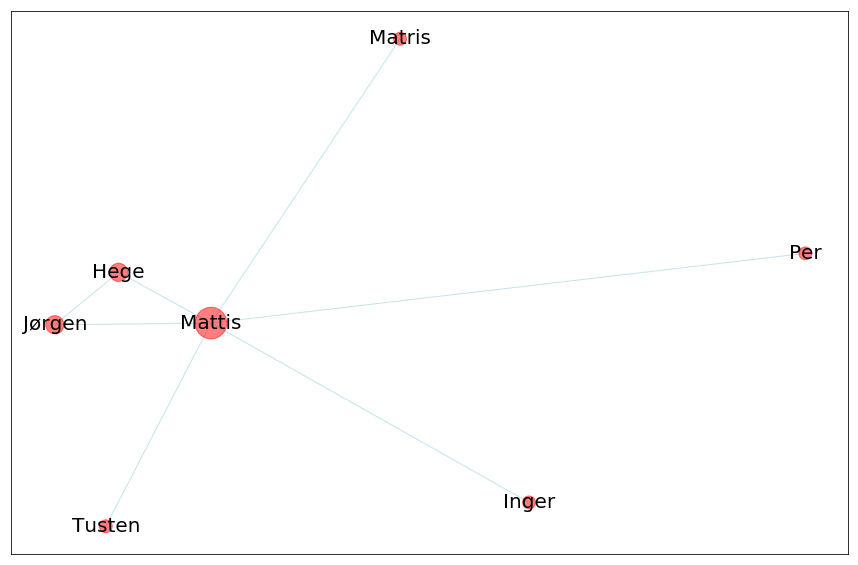

In [63]:
nb.draw_graph_centrality(network, k=2.5)

In [64]:
network.edges(data=True)

EdgeDataView([('Hege', 'Jørgen', {'weight': 94.0}), ('Hege', 'Mattis', {'weight': 169.0}), ('Jørgen', 'Mattis', {'weight': 128.0}), ('Mattis', 'Inger', {'weight': 9.0}), ('Mattis', 'Matris', {'weight': 5.0}), ('Mattis', 'Per', {'weight': 5.0}), ('Mattis', 'Tusten', {'weight': 12.0})])